# Knowledge Graph (KG) Dataloader with Lightning

This guide shows how to load and use a Knowledge Graph dataset with the PyTorch Lightning LightningDataModule.

To load and simulate data from the KG model, follow the steps below:

Step 1: 📦 Import the module

In [1]:
import sys
import os

# Go up to the root where `vpeleaderboard/` is located
sys.path.append(os.path.abspath("../../"))

In [2]:
from vpeleaderboard.data.src.kg.biobridge_datamodule_hetero import BioBridgeDataModule

Step 2: ⚙️ Initialize the KGDataModule

Specify the data directories and initialize the BioBridgeDataModule:

In [3]:
# Initial
# ize with paths to PrimeKG and BioBridge datasets
# dm = BioBridgeDataModule(
#     primekg_dir="../../../data/primekg/",
#     biobridge_dir="../../../data/biobridge_primekg/",
#     batch_size=8
# )
import hydra
with hydra.initialize(config_path="../../vpeleaderboard/configs", version_base=None):
    cfg = hydra.compose(config_name="config")
    dm = BioBridgeDataModule(cfg)


Step 3: 🧹 Prepare data

Prepare the KG data by loading and caching it:

In [4]:
# Load data, embeddings, and node/edge mappings
dm.prepare_data()

🔁 Loading cached data from ./biobridge_cache.pkl


Step 4: 🧠 Setup the data splits

Split the data into training, validation, and test sets:

In [5]:
# Build HeteroData and apply RandomLinkSplit
dm.setup()

Step 5: 🧪 Access the dataloaders

Now, you can retrieve the standard Lightning dataloaders:

In [6]:

print(dm.data.keys())  # Should include 'train', 'val', 'test' if setup worked


dict_keys(['nt2ntid', 'ntid2nt', 'init', 'train', 'val', 'test'])


Training data

In [7]:
train_loader = dm.train_dataloader()
train_batch = next(iter(train_loader))
print(train_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    node_name=[1],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    node_name=[1],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    node_name=[1],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    node_name=[1],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    node_name=[1],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    node_name=[1],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[440447],
    pos_edge_label_index=[2, 440447],
    neg_edge_label=[440447],
    neg_edge_label_index=[2, 440447],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[571],
    pos_e

Validation data

In [8]:
val_loader = dm.val_dataloader()
val_batch = next(iter(val_loader))
print(val_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    node_name=[1],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    node_name=[1],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    node_name=[1],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    node_name=[1],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    node_name=[1],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    node_name=[1],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 440447],
    pos_edge_label=[62920],
    pos_edge_label_index=[2, 62920],
    neg_edge_label=[62920],
    neg_edge_label_index=[2, 62920],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 571],
    pos_edge_label=[81],
    pos_edge_l

Test data

In [9]:
test_loader = dm.test_dataloader()
test_batch = next(iter(test_loader))
print(test_batch)


HeteroDataBatch(
  biological_process={
    num_nodes=27409,
    x=[27409, 768],
    node_name=[1],
    batch=[27409],
    ptr=[2],
  },
  cellular_component={
    num_nodes=4011,
    x=[4011, 768],
    node_name=[1],
    batch=[4011],
    ptr=[2],
  },
  disease={
    num_nodes=17054,
    x=[17054, 768],
    node_name=[1],
    batch=[17054],
    ptr=[2],
  },
  drug={
    num_nodes=6759,
    x=[6759, 512],
    node_name=[1],
    batch=[6759],
    ptr=[2],
  },
  gene/protein={
    num_nodes=18797,
    x=[18797, 2560],
    node_name=[1],
    batch=[18797],
    ptr=[2],
  },
  molecular_function={
    num_nodes=10951,
    x=[10951, 768],
    node_name=[1],
    batch=[10951],
    ptr=[2],
  },
  (gene/protein, ppi, gene/protein)={
    edge_index=[2, 503367],
    pos_edge_label=[125841],
    pos_edge_label_index=[2, 125841],
    neg_edge_label=[125841],
    neg_edge_label_index=[2, 125841],
  },
  (drug, carrier, gene/protein)={
    edge_index=[2, 652],
    pos_edge_label=[162],
    pos_e

In [10]:
# Train edge index
print("Train Edge Index:")
print(dm.data["train"].edge_index_dict)

# Validation edge index
print("Validation Edge Index:")
print(dm.data["val"].edge_index_dict)

# Test edge index
print("Test Edge Index:")
print(dm.data["test"].edge_index_dict)


Train Edge Index:
{('gene/protein', 'ppi', 'gene/protein'): tensor([[ 4352,  1719,  3463,  ...,  3849,  4128, 12007],
        [ 2757,   654,  2431,  ...,  1856,  1056,  7611]]), ('drug', 'carrier', 'gene/protein'): tensor([[  529,   139,   310,  ...,   519,   141,   161],
        [11715,  4706,  4293,  ...,  8509,  4293,  4706]]), ('drug', 'enzyme', 'gene/protein'): tensor([[  353,   662,   187,  ...,   832,   515,  1712],
        [12284, 12284, 13047,  ...,  2283, 14833, 11967]]), ('drug', 'target', 'gene/protein'): tensor([[1842, 3015, 2537,  ..., 1497, 2999, 2302],
        [4400, 1308, 2905,  ..., 9170,  957, 1490]]), ('drug', 'transporter', 'gene/protein'): tensor([[ 1868,  5610,   648,  ...,  3959,  2156,   967],
        [11499, 17660,  3169,  ...,  4131,  5448,  8392]]), ('drug', 'contraindication', 'disease'): tensor([[  453,  1030,  3352,  ...,   905,  1220,   747],
        [ 8574,  6869, 11199,  ...,  6504,  7670,  6393]]), ('drug', 'indication', 'disease'): tensor([[ 1752,  5

In [11]:
print("📌 Available node types:")
print(dm.data["train"].node_types)

print("📌 Available edge types:")
print(dm.data["train"].edge_types)


📌 Available node types:
[np.str_('biological_process'), np.str_('cellular_component'), np.str_('disease'), np.str_('drug'), np.str_('gene/protein'), np.str_('molecular_function')]
📌 Available edge types:
[('gene/protein', 'ppi', 'gene/protein'), ('drug', 'carrier', 'gene/protein'), ('drug', 'enzyme', 'gene/protein'), ('drug', 'target', 'gene/protein'), ('drug', 'transporter', 'gene/protein'), ('drug', 'contraindication', 'disease'), ('drug', 'indication', 'disease'), ('drug', 'off-label use', 'disease'), ('drug', 'synergistic interaction', 'drug'), ('gene/protein', 'associated with', 'disease'), ('disease', 'parent-child', 'disease'), ('biological_process', 'parent-child', 'biological_process'), ('molecular_function', 'parent-child', 'molecular_function'), ('cellular_component', 'parent-child', 'cellular_component'), ('gene/protein', 'interacts with', 'molecular_function'), ('gene/protein', 'interacts with', 'cellular_component'), ('gene/protein', 'interacts with', 'biological_process'

Step 6: 🕸️ Visualize a Subgraph of the Knowledge Graph

Plotting Local Neighborhood of a Node in a Heterogeneous Knowledge Graph (DYNC1I2 Example)

Graph with 21 nodes and 47 edges


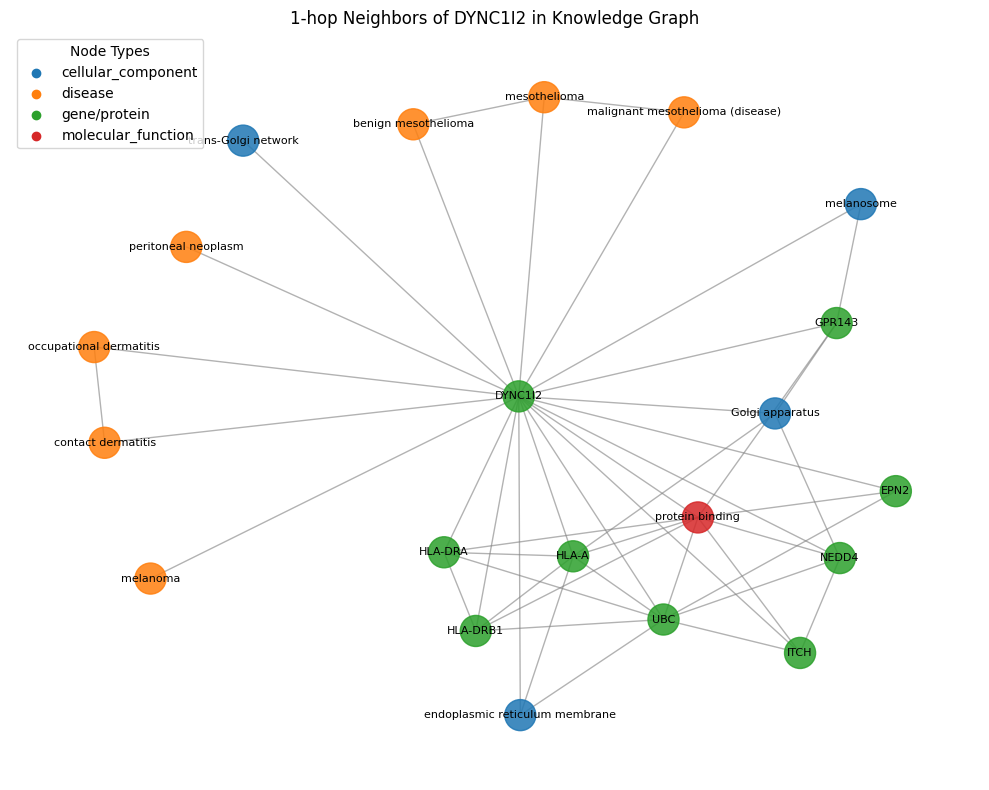

In [12]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from torch_geometric.utils import to_networkx

# Load data
with open("biobridge_cache.pkl", "rb") as f:
    data = pickle.load(f)

hetero_data = data["init"]
mapper = data.get("mapper", {})  # might be empty

target_node_type = "gene/protein"
target_node_name = "DYNC1I2"

# Manual map fallback
manual_map = {"DYNC1I2": 6726}
local_idx = mapper.get(target_node_type, {}).get(target_node_name) or manual_map.get(target_node_name)
if local_idx is None:
    raise ValueError(f"Node {target_node_name} not found")

# Convert to NetworkX graph
G_full = to_networkx(hetero_data)
G_full = nx.Graph(G_full)  # undirected


# Relabel nodes with (type, index)
offset = 0
mapping = {}
for node_type in hetero_data.node_types:
    n_nodes = hetero_data[node_type].num_nodes
    for i in range(n_nodes):
        mapping[offset + i] = (node_type, i)
    offset += n_nodes
G_full = nx.relabel_nodes(G_full, mapping)

target_node_nx = (target_node_type, local_idx)
if target_node_nx not in G_full:
    raise ValueError(f"Node {target_node_nx} not found in graph")

# Build 1-hop subgraph
neighbors = list(G_full.adj[target_node_nx])
sub_nodes = [target_node_nx] + neighbors
G_sub = G_full.subgraph(sub_nodes).copy()
print(G_sub)

# Build reverse_mapper from hetero_data.node_name (more reliable)
reverse_mapper = {}
for node_type in hetero_data.node_types:
    node_names = hetero_data[node_type].node_name  # numpy array of names
    if node_names is None:
        continue  # skip if missing
    for idx, name in enumerate(node_names):
        # node_name might be bytes if pickled, decode if needed
        if isinstance(name, bytes):
            name = name.decode('utf-8')
        reverse_mapper[(node_type, idx)] = name

# Add manual reverse map for known missing mappings
manual_reverse_map = {
    (target_node_type, local_idx): target_node_name
}
reverse_mapper.update(manual_reverse_map)

# Create labels using node names, fallback to "type_index"
labels = {
    node: reverse_mapper.get(node, f"{node[0]}_{node[1]}")
    for node in G_sub.nodes
}

node_types = {node: node[0] for node in G_sub.nodes}
unique_types = sorted(set(node_types.values()))
palette = list(mcolors.TABLEAU_COLORS.values())
color_map = {ntype: palette[i % len(palette)] for i, ntype in enumerate(unique_types)}
node_colors = [color_map[node_types[node]] for node in G_sub.nodes]

# Plot
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sub, seed=42)
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=500, alpha=0.85)
nx.draw_networkx_edges(G_sub, pos, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G_sub, pos, labels, font_size=8)

# Legend
for ntype, color in color_map.items():
    plt.scatter([], [], color=color, label=ntype)
plt.legend(title="Node Types", loc="upper left")

plt.title(f"1-hop Neighbors of {target_node_name} in Knowledge Graph")
plt.axis("off")
plt.tight_layout()
plt.show()